In [13]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import ast

In [14]:
airplane = np.load('data/airplane.npy')
car = np.load('data/car.npy')
dragon = np.load('data/dragon.npy')
crocodile = np.load('data/crocodile.npy')
computer = np.load('data/computer.npy')
elephant = np.load('data/elephant.npy')
flower = np.load('data/flower.npy')
guitar = np.load('data/guitar.npy')
hamburger = np.load('data/hamburger.npy')
helicopter = np.load('data/helicopter.npy')
house = np.load('data/house.npy')
hurricane = np.load('data/hurricane.npy')
jail = np.load('data/jail.npy')
keyboard = np.load('data/keyboard.npy')
leaf = np.load('data/leaf.npy')
mermaid = np.load('data/mermaid.npy')
microwave = np.load('data/microwave.npy')
monkey = np.load('data/monkey.npy')
pants = np.load('data/pants.npy')
broccoli = np.load('data/broccoli.npy')
brain = np.load('data/brain.npy')
raccoon = np.load('data/raccoon.npy')
radio = np.load('data/radio.npy')
rifle = np.load('data/rifle.npy')
sink = np.load('data/sink.npy')

airplane = airplane[:1000, :]
car = car[:1000, :]
dragon = dragon[:1000, :]
crocodile = crocodile[:1000, :]
computer = computer[:1000, :]
elephant = elephant[:1000, :]
flower = flower[:1000, :]
guitar = guitar[:1000, :]
hamburger = hamburger[:1000, :]
helicopter = helicopter[:1000, :]
house = house[:1000, :]
hurricane = hurricane[:1000, :]
jail = jail[:1000, :]
keyboard = keyboard[:1000, :]
leaf = leaf[:1000, :]
mermaid = mermaid[:1000, :]
microwave = microwave[:1000, :]
monkey = monkey[:1000, :]
pants = pants[:1000, :]
broccoli = broccoli[:1000, :]
brain = brain[:1000, :]
raccoon = raccoon[:1000, :]
radio = radio[:1000, :]
rifle = rifle[:1000, :]
sink = sink[:1000, :]

labels = ['airplane', 'car', 'dragon', 'crocodile', 'computer', 'elephant', 'flower', 'guitar', 'hamburger',
               'helicopter', 'house', 'hurricane', 'jail', 'keyboard', 'leaf', 'mermaid', 'microwave', 'monkey',
               'pants', 'broccoli', 'brain', 'raccoon', 'radio', 'rifle', 'sink']
label_arrs = [airplane, car, dragon, crocodile, computer, elephant, flower, guitar, hamburger, helicopter,
                   house, hurricane, jail, keyboard, leaf, mermaid, microwave, monkey, pants, broccoli, brain,
                   raccoon, radio, rifle, sink]

encoding = {
    'airplane': 0,
    'car': 1,
    'dragon': 2,
    'crocodile': 3,
    'computer': 4,
    'elephant': 5,
    'flower': 6,
    'guitar': 7,
    'hamburger': 8,
    'helicopter': 9,
    'house': 10,
    'hurricane': 11,
    'jail': 12,
    'keyboard': 13,
    'leaf': 14,
    'mermaid': 15,
    'microwave': 16,
    'monkey': 17,
    'pants': 18,
    'broccoli': 19,
    'brain': 20,
    'raccoon': 21,
    'radio': 22,
    'rifle': 23,
    'sink': 24
}

reversed_encoding = {
    0: 'airplane',
    1: 'car',
    2: 'dragon',
    3: 'crocodile',
    4: 'computer',
    5: 'elephant',
    6: 'flower',
    7: 'guitar',
    8: 'hamburger',
    9: 'helicopter',
    10: 'house',
    11: 'hurricane',
    12: 'jail',
    13: 'keyboard',
    14: 'leaf',
    15: 'mermaid',
    16: 'microwave',
    17: 'monkey',
    18: 'pants',
    19: 'broccoli',
    20: 'brain',
    21: 'raccoon',
    22: 'radio',
    23: 'rifle',
    24: 'sink'
}

datapts = []

for label, arr in zip(labels, label_arrs):
    for row in arr:
        datapts.append({'image': row, 'label': label})

all_data = pd.DataFrame(datapts)
all_data['label'] = all_data['label'].apply(lambda x : encoding[x])

def plot_image(img):
    img = torch.reshape(img, (28, 28))
    plt.show(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [25]:
#dataset = 
#load dataset into dataloader, etc

class SketchDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe.reset_index(drop=True)  # Reset indices to ensure contiguity
        self.images, self.labels = self.dataframe['image'], self.dataframe['label']
        
    def __len__(self):
        return len(self.images)
        
    def __getitem__(self, idx):
        img = self.images[idx]
        img = img.reshape((28,28))
        label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)
        img_tensor = torch.tensor(img, dtype=torch.float32)
            
        return img_tensor, label_tensor

# Assuming you have defined your DataFrame 'all_data' somewhere
shuffled_df = all_data.sample(frac=1, random_state=42)

total_rows = len(shuffled_df)
train_rows = int(0.7 * total_rows)
val_rows = int(0.1 * total_rows)

train_df = shuffled_df[:train_rows]
val_df = shuffled_df[train_rows:train_rows + val_rows]
test_df = shuffled_df[train_rows + val_rows:]

batch_size = 50

train_dataset = SketchDataset(train_df)
val_dataset = SketchDataset(val_df)
test_dataset = SketchDataset(test_df)

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size)


In [26]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super(ImageClassifier, self).__init__()
        #goal: simplified Alexnet architecture
        #input: 28x28x1 image, grayscaled
        #first idea: 3 conv-relu-pool layers, followed by 2 fc layers and softmax non-linearity

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, 3, 1, 'same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(10, 20, 3, 1, 'same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )     

        self.linear_layers = nn.Sequential(
            nn.Linear(980, 980),
            nn.ReLU(),
            nn.Dropout(p = .2),
            nn.Linear(980, 25)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x, start_dim = 1)
        return self.linear_layers(x)

    def predict(self, x):
        x = torch.reshape(x, (1, 1, 28, 28))
        output = self.forward(x)
        return reversed_encoding[torch.argmax(output, dim=1).item()]

In [42]:
lr = .00022
epochs = 100

model = ImageClassifier()
optim = torch.optim.Adam(model.parameters(), lr, weight_decay = .15)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optim, gamma = .95)
loss_function = nn.CrossEntropyLoss()
train_loss_per_epoch = []
val_loss_per_epoch = []

for epoch in range(epochs):
    train_acc = 0.
    val_acc = 0.
    train_loss = []
    val_loss = []
    
    model.train()
    for idx, batch in enumerate(train_dataloader):
        optim.zero_grad()
        inputs, labels = batch
        inputs = torch.reshape(inputs, (batch_size, 1, 28, 28))
        outputs = model.forward(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optim.step()
        train_loss.append(loss.item())
        prediction = torch.argmax(outputs, dim=1)
        batch_acc = (prediction == labels).sum().item()
        train_acc += batch_acc
    scheduler.step()
    
    model.eval()  
    for idx, batch in enumerate(val_dataloader):
        with torch.no_grad():  
            inputs, labels = batch
            inputs = torch.reshape(inputs, (batch_size, 1, 28, 28))
            outputs = model.forward(inputs)
            loss = loss_function(outputs, labels)
            val_loss.append(loss.item())
            prediction = torch.argmax(outputs, dim=1)
            batch_acc = (prediction == labels).sum().item()
            val_acc += batch_acc
    train_acc /= len(train_dataloader.dataset)
    val_acc /= len(val_dataloader.dataset)
    print("Epoch:", epoch, "Train Loss:", np.mean(train_loss), "Train Acc:", train_acc, "Val Loss:", np.mean(val_loss), "Val Acc:", val_acc)
    train_loss_per_epoch.append(np.mean(train_loss))
    val_loss_per_epoch.append(np.mean(val_loss))
    


Epoch: 0 Train Loss: 2.080813091993332 Train Acc: 0.5270857142857143 Val Loss: 1.1493122744560242 Val Acc: 0.6772
Epoch: 1 Train Loss: 1.0687279561587741 Train Acc: 0.6944 Val Loss: 0.9877767848968506 Val Acc: 0.7168
Epoch: 2 Train Loss: 0.9233934764351164 Train Acc: 0.7377714285714285 Val Loss: 0.9173037469387054 Val Acc: 0.7452
Epoch: 3 Train Loss: 0.8725748526198523 Train Acc: 0.7494857142857143 Val Loss: 0.8885603940486908 Val Acc: 0.7516
Epoch: 4 Train Loss: 0.8424337926081249 Train Acc: 0.7617714285714285 Val Loss: 0.8822746729850769 Val Acc: 0.7488
Epoch: 5 Train Loss: 0.8217382213047573 Train Acc: 0.7672 Val Loss: 0.8599487698078155 Val Acc: 0.7588
Epoch: 6 Train Loss: 0.803529954978398 Train Acc: 0.7718857142857143 Val Loss: 0.8730664747953415 Val Acc: 0.754
Epoch: 7 Train Loss: 0.7885225611925125 Train Acc: 0.7749142857142857 Val Loss: 0.8622733700275421 Val Acc: 0.752
Epoch: 8 Train Loss: 0.7717485273735863 Train Acc: 0.7821142857142858 Val Loss: 0.8120372867584229 Val Acc: 

In [44]:
#evaluate on test set !!!
correct = 0
    
model.eval()  
for idx, batch in enumerate(test_dataloader):
    with torch.no_grad():  
        inputs, labels = batch
        inputs = torch.reshape(inputs, (batch_size, 1, 28, 28))
        outputs = model.forward(inputs)
        prediction = torch.argmax(outputs, dim=1)
        batch_correct = (prediction == labels).sum().item()
        correct += batch_correct
            
print("Accuracy:", correct/len(test_dataloader.dataset))

Accuracy: 0.7958


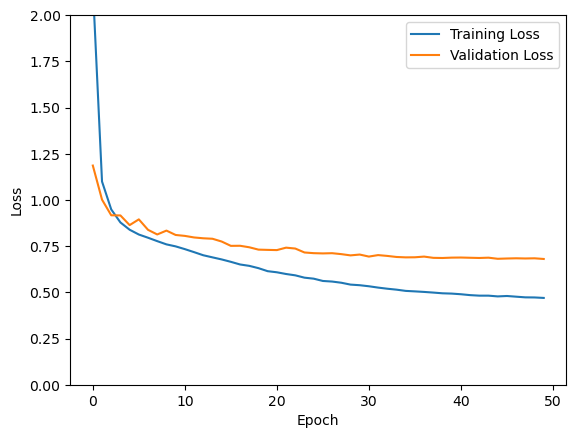

In [34]:
plt.plot(train_loss_per_epoch, label='Training Loss')
plt.plot(val_loss_per_epoch, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()

plt.show()


tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,  58.,  57.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0., 174., 207.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0., 116., 254.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,  51., 255.,  82.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,

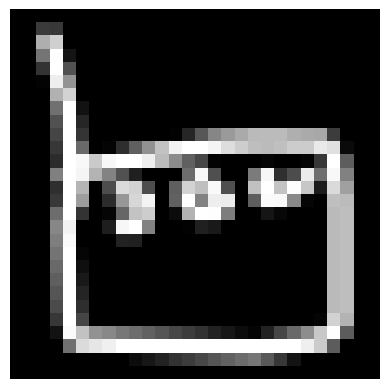

radio


In [43]:
input, output = test_dataset[51]
plt.imshow(input, cmap='gray')
print(input)
plt.axis('off')  # Turn off axis
plt.show()
print(model.predict(input))

In [ ]:
torch.save(model, 'model.pth')